# AG News Dataset

The AG News dataset is a widely used benchmark for text classification tasks, particularly for news categorization. It consists of a total of **120,000 training samples** and **7,600 test samples**, categorized into four distinct classes:

1. **World**: News articles covering global events and international affairs.
2. **Sports**: Articles related to various sports, events, and athletes.
3. **Business**: News focusing on business, economics, and industry topics.
4. **Science & Technology**: Articles discussing scientific discoveries, technological advancements, and related topics.

## Key Features:

- **Text Data**: Each entry includes a news article title and its corresponding body text.
- **Multi-Class Classification**: The goal is to classify each article into one of the four predefined categories.
- **Balanced Classes**: Each class contains an approximately equal number of samples, making it suitable for training machine learning models.

## Use Cases:

- **Text Classification**: Ideal for training and testing models in natural language processing (NLP).
- **Sentiment Analysis**: Can be adapted for sentiment analysis tasks related to news topics.
- **Machine Learning Research**: Commonly used in academia and industry for benchmarking new algorithms and models.

The dataset is publicly available and widely utilized in various NLP research projects and competitions.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datasets import load_dataset

# Load the dataset
ds = load_dataset("fancyzhx/ag_news")

# Convert the Hugging Face dataset to a pandas DataFrame
df = ds['train'].to_pandas()

# Step 1: Retain relevant columns and drop NaN values
df_clean = df[['label', 'text']].dropna()  # Drop rows with NaN values in 'label' or 'text'
df_clean.columns = ['label', 'message']  # Rename columns for clarity

# Step 2: Encode labels (1 to 4)
# Ensure that all label values are present in the map dictionary.
df_clean['label_encoded'] = df_clean['label'].map({1: 0, 2: 1, 3: 2, 4: 3})

# Remove any rows where 'label_encoded' is NaN
df_clean = df_clean.dropna(subset=['label_encoded'])

# Step 3: Split the data into training and testing sets
X = df_clean['message']
y = df_clean['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Convert messages to numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# Step 6: Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test_vectorized)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

# Step 8: Predict on a new message
sample_message = ['The stock market is up today.', 'The team won the championship!']
sample_vectorized = vectorizer.transform(sample_message)
sample_prediction = naive_bayes_model.predict(sample_vectorized)

# Output the prediction for the sample messages
for msg, pred in zip(sample_message, sample_prediction):
    category = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Science/Technology'}
    print(f'The message: "{msg}" is classified as: {category[pred]}')


Accuracy: 0.9352
Confusion Matrix:
[[5985   36   37]
 [  62 5392  556]
 [  38  438 5456]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6058
         1.0       0.92      0.90      0.91      6010
         2.0       0.90      0.92      0.91      5932

    accuracy                           0.94     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.94      0.94      0.94     18000

The message: "The stock market is up today." is classified as: Sports
The message: "The team won the championship!" is classified as: World


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
None
               label
count  120000.000000
mean        1.500000
std         1.118039
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64


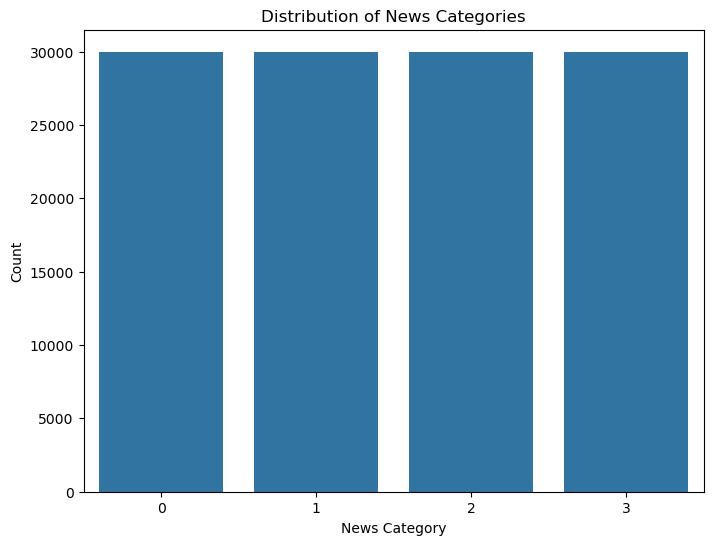

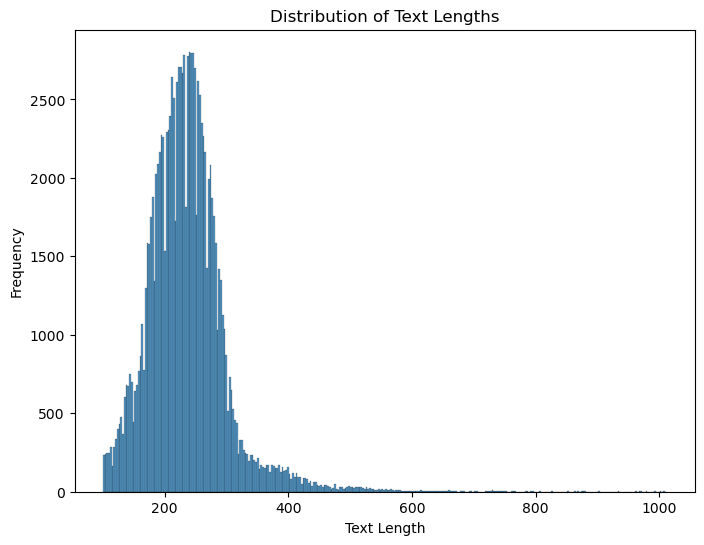

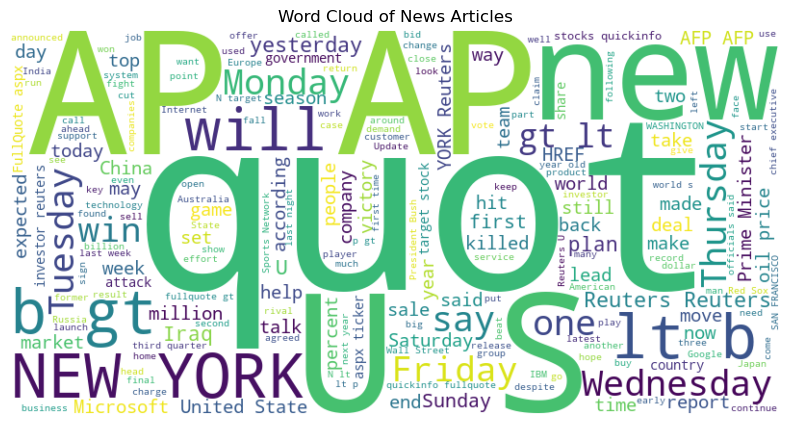

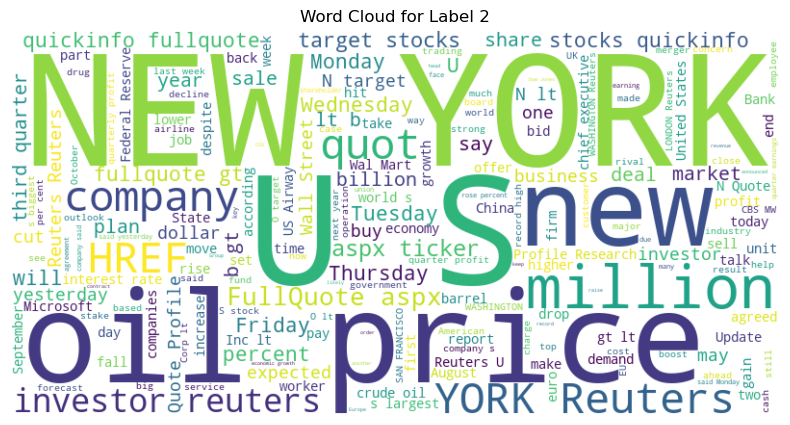

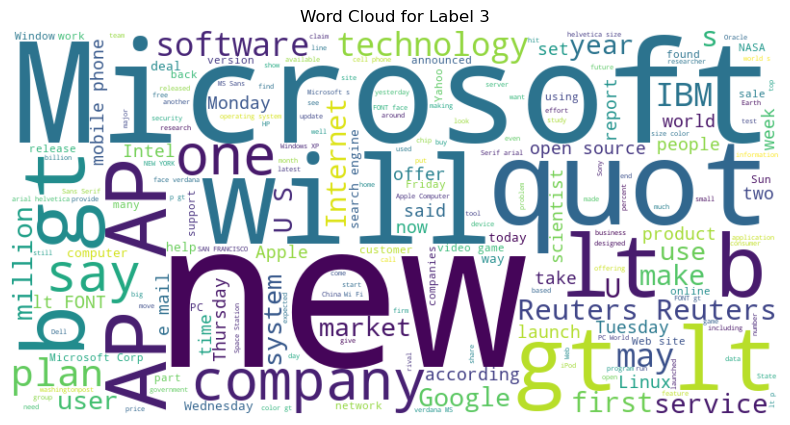

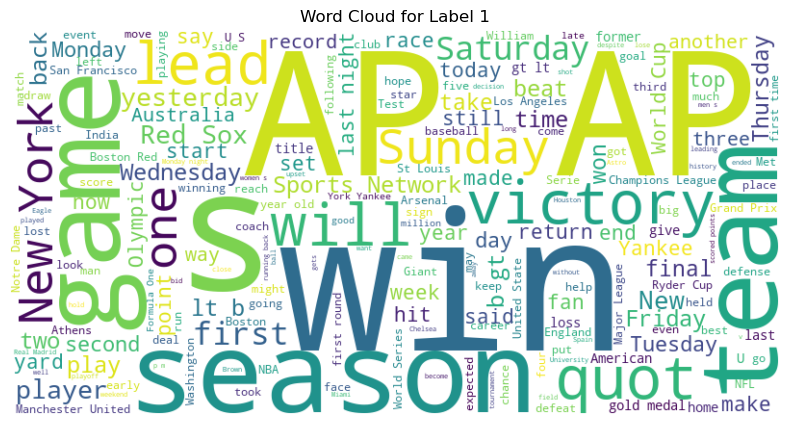

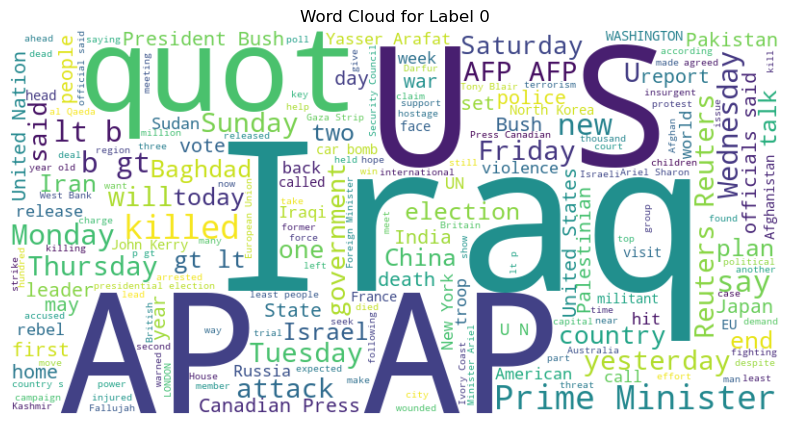

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'text' and 'label' columns
# df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your file path

# 1. Basic Data Exploration
print(df.info())  # Check data types and missing values
print(df.describe())  # Descriptive statistics for numerical columns
print(df['label'].value_counts())  # Count occurrences of each label


# 2. Analyze Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of News Categories')
plt.xlabel('News Category')
plt.ylabel('Count')
plt.show()

# 3. Analyze Text Length (optional)
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(x='text_length', data=df)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 4. Word Cloud (Optional)
from wordcloud import WordCloud


# Combine all texts into a single string
text = ' '.join(df['text'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Articles')
plt.show()

# 5. Explore label-specific text patterns (Optional)
for label in df['label'].unique():
    text_for_label = ' '.join(df[df['label'] == label]['text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_label)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()

# Add more analysis as needed, such as:
# - Exploring the frequency of specific words or phrases in each label
# - Creating bigrams or trigrams to understand common word combinations
# - Analyzing the sentiment of text within each label




In [5]:
import gradio as gr
def predict_newsgroup(text):
  """Predicts the newsgroup category for a given text."""
  text_vectorized = vectorizer.transform([text])
  prediction = naive_bayes_model.predict(text_vectorized)[0]
  category = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Science/Technology'}
  return category.get(prediction, "Unknown")


iface = gr.Interface(
    fn=predict_newsgroup,
    inputs=gr.Textbox(lines=5, label="Enter News Text"),
    outputs="text",
    title="AG News Classifier",
    description="Enter some text and the model will predict which news category it belongs to.",
)

iface.launch()


Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.


In [6]:
X_test.value_counts()


message
Illinois Governor Seeks Restrictions on Video Game Sales Description: Illinois Gov. Rod Blagojevich is backing state legislation that would ban sales or rentals of video games with graphic sexual or violent content to children under 18.            1
Rentokil shares drop on profit warning Rentokil warned investors to expect lower profits for 2005 after reported a fall in profits for most of the 2004 and revealed it was finally washing its hands of parts of its UK hygiene business.              1
Russia gets budget version of Windows Microsoft effort is designed to wean people off pirated software and the open-source Linux OS.                                                                                                                    1
Amazon creates greenhouse gas THE burning and deforestation of Brazil #39;s vast Amazon rain forest causes nearly 3 per cent of the world #39;s greenhouse gas emissions, according to a government report released today.                        